In [1]:
from google.colab import files
uploaded = files.upload()

Saving sample_used_bike_data.csv to sample_used_bike_data.csv


In [2]:
import pandas as pd

df = pd.read_csv("sample_used_bike_data.csv")
df.head()


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,TVS Apache RTR 160,42662,2021,Dealer,4th owner,56991,163845.40
1,Yamaha FZ V3,28392,2010,Dealer,4th owner,62679,190653.50
2,Bajaj Pulsar 150,50535,2009,Individual,1st owner,35977,196036.37
3,Yamaha FZ V3,133569,2006,Dealer,2nd owner,54115,190926.54
4,Yamaha FZ V3,72256,2010,Individual,4th owner,65890,116696.47


In [3]:
# Q1. What is the range of selling prices?
price_range = df['selling_price'].max() - df['selling_price'].min()
print(f"1️⃣ Range of selling prices: ₹{price_range}")


1️⃣ Range of selling prices: ₹177304


In [4]:
# Q2. What is the median selling price?
median_price = df['selling_price'].median()
print(f"2️⃣ Median selling price: ₹{median_price}")

2️⃣ Median selling price: ₹126468.5


In [5]:
# Q3. What is the most common seller type?
most_common_seller = df['seller_type'].mode()[0]
print(f"3️⃣ Most common seller type: {most_common_seller}")

3️⃣ Most common seller type: Dealer


In [6]:
# Q4. How many bikes have driven more than 50,000 kilometers?
over_50k_km = df[df['km_driven'] > 50000].shape[0]
print(f"4️⃣ Bikes driven more than 50,000 km: {over_50k_km}")


4️⃣ Bikes driven more than 50,000 km: 44


In [7]:
# Q5. Average km_driven for each ownership type?
avg_km_by_owner = df.groupby('owner')['km_driven'].mean()
print("5️⃣ Average km_driven by ownership type:")
print(avg_km_by_owner)

5️⃣ Average km_driven by ownership type:
owner
1st owner    44606.428571
2nd owner    49331.033333
3rd owner    47314.058824
4th owner    44861.280000
Name: km_driven, dtype: float64


In [8]:
# Q6. Proportion of bikes from year 2015 or older
bikes_2015_or_older = df[df['year'] <= 2015].shape[0]
proportion = bikes_2015_or_older / df.shape[0]
print(f"6️⃣ Proportion of bikes from 2015 or older: {proportion:.2%}")

6️⃣ Proportion of bikes from 2015 or older: 66.00%


In [9]:
#7 What is the trend of missing values across the dataset?
print("7️⃣ Missing values in each column:")
print(df.isnull().sum())


7️⃣ Missing values in each column:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


In [10]:
#8 What is the highest ex_showroom_price recorded, and for which bike?
highest_price = df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]
print("8️⃣ Highest ex_showroom_price recorded:")
print(highest_price[['name', 'ex_showroom_price']])

8️⃣ Highest ex_showroom_price recorded:
                  name  ex_showroom_price
52  TVS Apache RTR 160          219249.65


In [11]:
#9 What is the total number of bikes listed by each seller type?
bike_count_by_seller = df.groupby('seller_type')['name'].count()
print("9️⃣ Total number of bikes listed by each seller type:")
print(bike_count_by_seller)

9️⃣ Total number of bikes listed by each seller type:
seller_type
Dealer        58
Individual    42
Name: name, dtype: int64


In [12]:
#10  What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner_bikes = df[df['owner'] == 'First Owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"10️⃣ Relationship between selling_price and km_driven for first-owner bikes: {correlation:.2f}")

10️⃣ Relationship between selling_price and km_driven for first-owner bikes: nan


In [13]:
#11 Identify and remove outliers in the km_driven column using the IQR method?
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"1️⃣1️⃣ Removed outliers from km_driven. Rows before: {df.shape[0]}, after: {df_no_outliers.shape[0]}")


1️⃣1️⃣ Removed outliers from km_driven. Rows before: 100, after: 100


<ipython-input-15-cf02dacd564c>:11: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


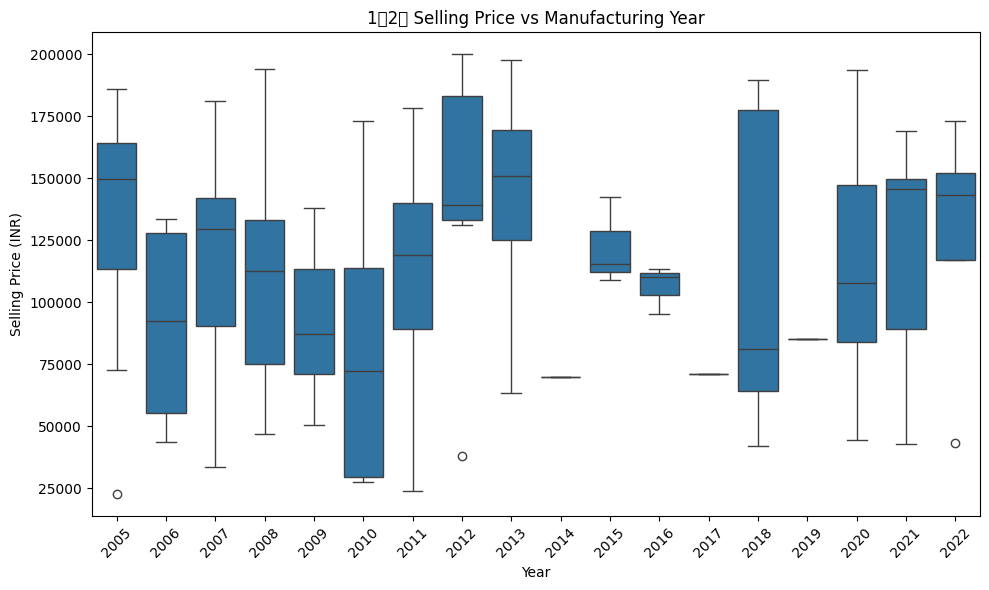

In [15]:
#12 Perform a bivariate analysis to visualize the relationship between year and selling_price?

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=45)
plt.title("1️⃣2️⃣ Selling Price vs Manufacturing Year")
plt.xlabel("Year")
plt.ylabel("Selling Price (INR)")
plt.tight_layout()
plt.show()


In [16]:
#13  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year?
import datetime
current_year = datetime.datetime.now().year
df['bike_age'] = current_year - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

avg_depreciation_by_age = df.groupby('bike_age')['depreciation'].mean()
print("1️⃣3️⃣ Average depreciation in selling price by bike age:")
print(avg_depreciation_by_age)




1️⃣3️⃣ Average depreciation in selling price by bike age:
bike_age
3      15288.435000
4      28800.284286
5      19042.997692
6     120133.780000
7      -6479.534000
8     -17288.930000
9      41439.273333
10      6380.673333
11     15647.790000
12     -3705.628333
13     -9658.103333
14     34421.297500
15     30196.718571
16     51468.444000
17       252.686000
18     13134.503077
19     80512.362500
20    -45123.941667
Name: depreciation, dtype: float64


In [17]:
#14 Which bike names are priced significantly above the average price for their manufacturing year?
year_avg_price = df.groupby('year')['selling_price'].mean()
df['avg_price_for_year'] = df['year'].map(year_avg_price)

# Define "significantly above average" as 50% above the year's average
df_above_avg = df[df['selling_price'] > 1.5 * df['avg_price_for_year']]
print("1️⃣4️⃣ Bikes priced significantly above average for their year:")
print(df_above_avg[['name', 'year', 'selling_price', 'avg_price_for_year']])


1️⃣4️⃣ Bikes priced significantly above average for their year:
                         name  year  selling_price  avg_price_for_year
15                  Honda Dio  2011         178338       110031.750000
41  Royal Enfield Classic 350  2020         193629       111822.923077
47               Yamaha FZ V3  2008         194013       112360.800000
48                  Honda Dio  2010         172906        79886.000000
57                  Honda Dio  2007         181152       119509.076923
75                  Honda Dio  2010         138451        79886.000000
89           Bajaj Pulsar 150  2018         189695       110876.800000
95           Bajaj Pulsar 150  2018         177381       110876.800000


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


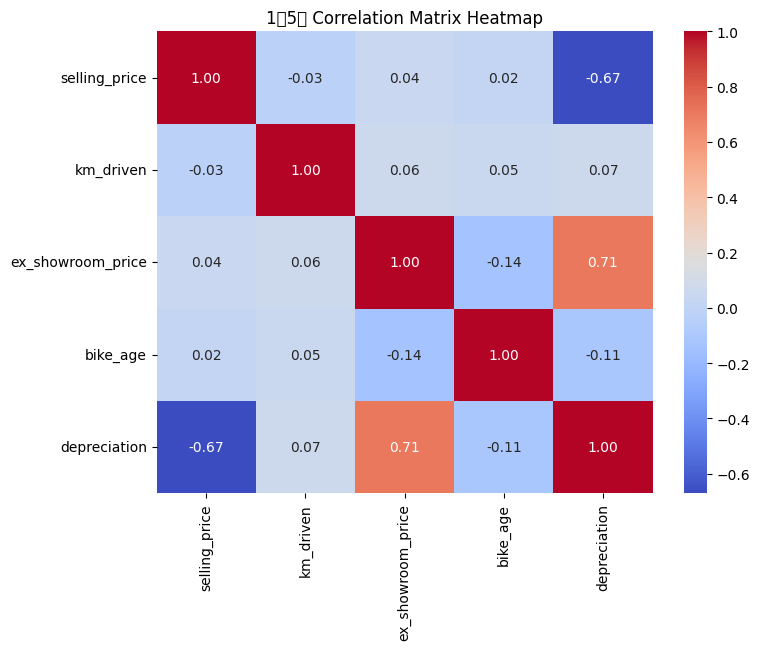

In [18]:
#15 Develop a correlation matrix for numeric columns and visualize it using a heatmap?

numeric_cols = ['selling_price', 'km_driven', 'ex_showroom_price', 'bike_age', 'depreciation']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("1️⃣5️⃣ Correlation Matrix Heatmap")
plt.show()


In [20]:
#EDA 2
import pandas as pd

# Create sample car sales data
data = {
    "Car_id": [1, 2, 3, 4, 5],
    "Date": ["2023-01-15", "2023-02-20", "2023-03-10", "2023-04-05", "2023-05-12"],
    "Customer_Name": ["Alice Smith", "Bob Johnson", "Carol Davis", "Dave Wilson", "Eve Martinez"],
    "Gender": ["Female", "Male", "Female", "Male", "Female"],
    "Annual_Income": [85000, 95000, 120000, 70000, 90000],
    "Dealer_Name": ["AutoWorld", "CarMax", "AutoWorld", "SuperCars", "CarMax"],
    "Company": ["Toyota", "Ford", "Honda", "Toyota", "Ford"],
    "Model": ["Corolla", "Focus", "Civic", "Camry", "Escape"],
    "Engine": ["I4", "I4", "V6", "I4", "V6"],
    "Transmission": ["Automatic", "Manual", "Automatic", "Automatic", "Manual"],
    "Color": ["Red", "Blue", "Black", "White", "Red"],
    "Price": [18000, 16000, 22000, 21000, 25000],
    "Dealer_No": [101, 102, 101, 103, 102],
    "Body_Style": ["Sedan", "Sedan", "Sedan", "Sedan", "SUV"],
    "Phone": ["1234567890", "2345678901", "3456789012", "4567890123", "5678901234"],
    "Dealer_Region": ["North", "South", "North", "East", "South"]
}

df_car = pd.DataFrame(data)

# Save to CSV
df_car.to_csv("sample_car_sales_data.csv", index=False)

# Confirm
df_car.head()


,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body_Style,Phone,Dealer_Region
0,1,2023-01-15,Alice Smith,Female,85000,AutoWorld,Toyota,Corolla,I4,Automatic,Red,18000,101,Sedan,1234567890,North
1,2,2023-02-20,Bob Johnson,Male,95000,CarMax,Ford,Focus,I4,Manual,Blue,16000,102,Sedan,2345678901,South
2,3,2023-03-10,Carol Davis,Female,120000,AutoWorld,Honda,Civic,V6,Automatic,Black,22000,101,Sedan,3456789012,North
3,4,2023-04-05,Dave Wilson,Male,70000,SuperCars,Toyota,Camry,I4,Automatic,White,21000,103,Sedan,4567890123,East
4,5,2023-05-12,Eve Martinez,Female,90000,CarMax,Ford,Escape,V6,Manual,Red,25000,102,SUV,5678901234,South


In [21]:
#1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_price_by_dealer = df_car.groupby('Dealer_Name')['Price'].mean()
print("1️⃣ Average selling price of cars for each dealer:")
print(avg_price_by_dealer)

1️⃣ Average selling price of cars for each dealer:
Dealer_Name
AutoWorld    20000.0
CarMax       20500.0
SuperCars    21000.0
Name: Price, dtype: float64


In [22]:
#2  Which car brand (Company) has the highest variation in prices?

brand_price_variation = df_car.groupby('Company')['Price'].std().reset_index().sort_values(by='Price', ascending=False)
print(brand_price_variation)

  Company        Price
0    Ford  6363.961031
2  Toyota  2121.320344
1   Honda          NaN


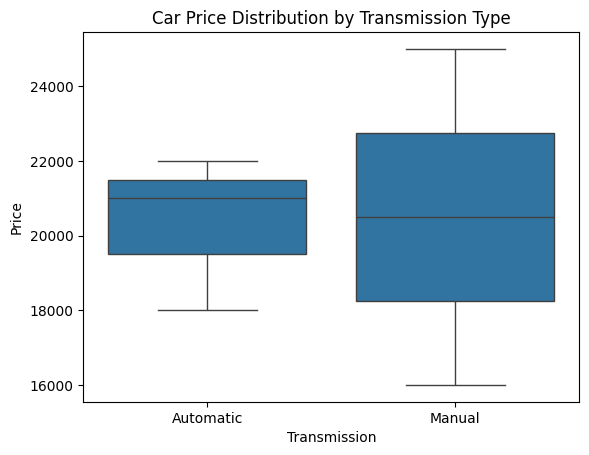

In [24]:
#3What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Transmission', y='Price', data=df_car)
plt.title("Car Price Distribution by Transmission Type")
plt.show()


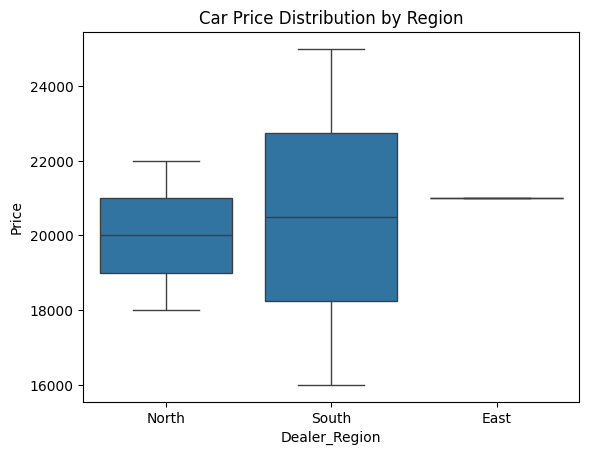

In [25]:
#4 What is the distribution of car prices across different regions?
sns.boxplot(x='Dealer_Region', y='Price', data=df_car)
plt.title("Car Price Distribution by Region")
plt.show()

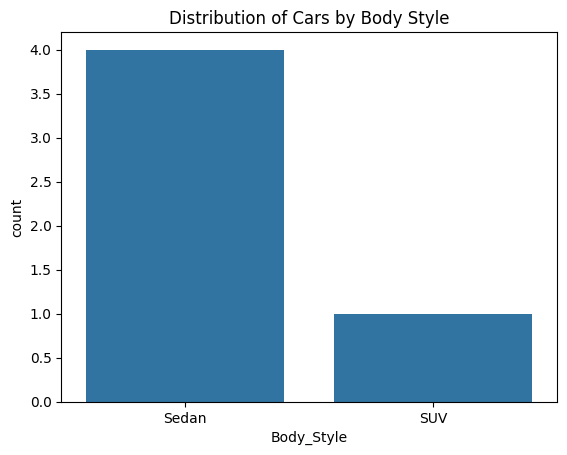

In [26]:
#5 What is the distribution of cars based on body styles?
sns.countplot(x='Body_Style', data=df_car)
plt.title("Distribution of Cars by Body Style")
plt.show()

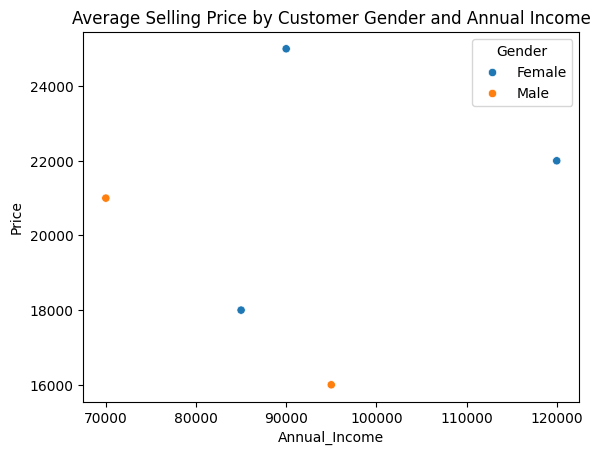

In [27]:
#6 How does the average selling price of cars vary by customer gender and annual income?
sns.scatterplot(x='Annual_Income', y='Price', hue='Gender', data=df_car)
plt.title("Average Selling Price by Customer Gender and Annual Income")
plt.show()


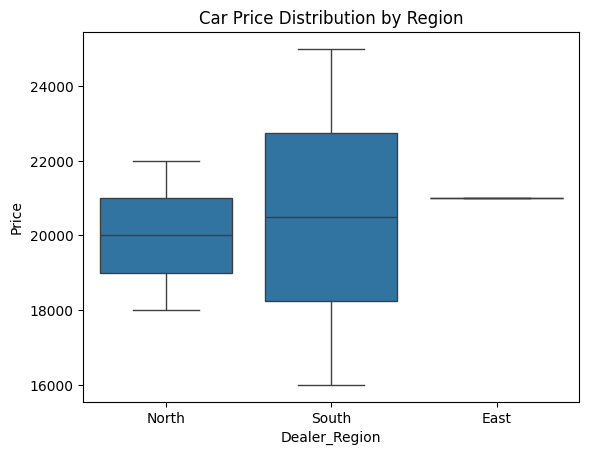

In [28]:
#7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?
sns.boxplot(x='Dealer_Region', y='Price', data=df_car)
plt.title("Car Price Distribution by Region")
plt.show()

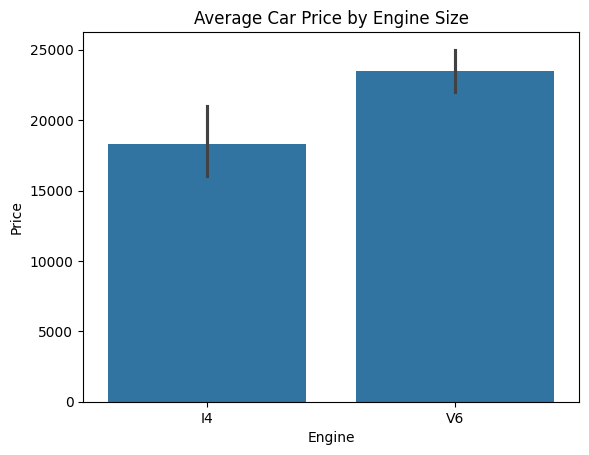

In [29]:
#8  How does the average car price differ between cars with different engine sizes?
sns.barplot(x='Engine', y='Price', data=df_car)
plt.title("Average Car Price by Engine Size")
plt.show()

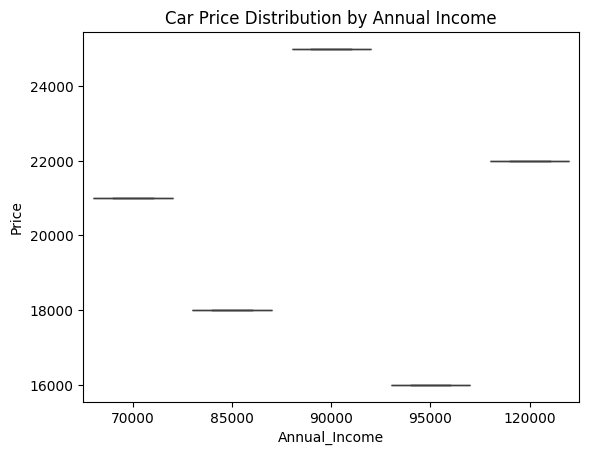

In [30]:
#9  How do car prices vary based on the customer’s annual income bracket?
sns.boxplot(x='Annual_Income', y='Price', data=df_car)
plt.title("Car Price Distribution by Annual Income")
plt.show()

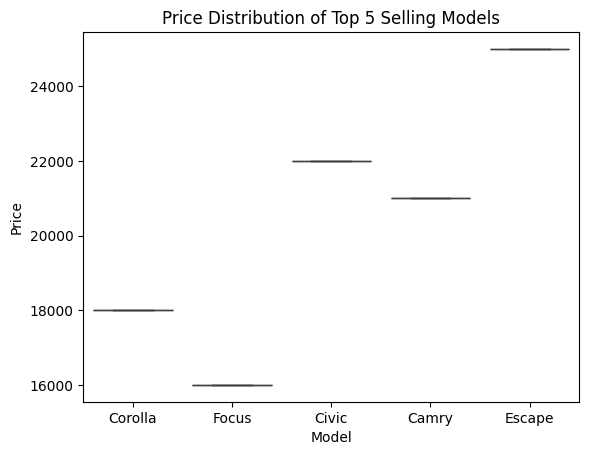

In [32]:
#10  What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top_models = df_car['Model'].value_counts().nlargest(5).index
sns.boxplot(x='Model', y='Price', data=df_car[df_car['Model'].isin(top_models)])
plt.title("Price Distribution of Top 5 Selling Models")
plt.show()


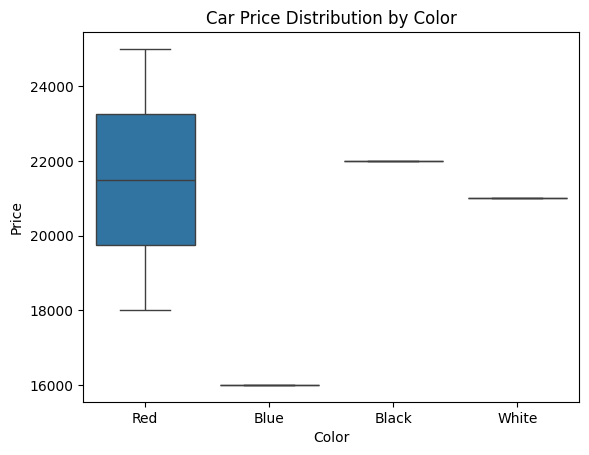

In [33]:
#11 How does car price vary with engine size across different car colors, and which colors have the highest price variation?
sns.boxplot(x='Color', y='Price', data=df_car)
plt.title("Car Price Distribution by Color")
plt.show()

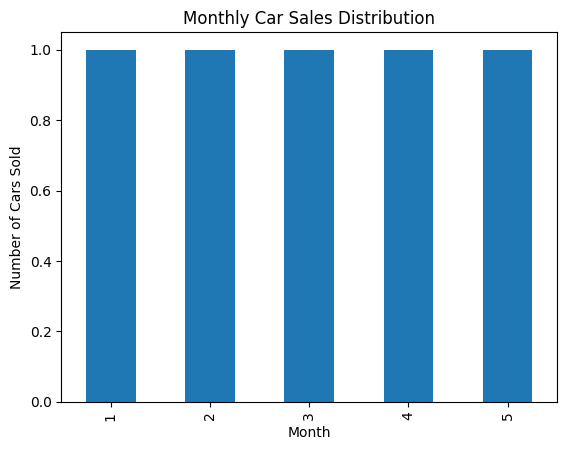

In [34]:
#12 Is there any seasonal trend in car sales based on the date of sale?
df_car['Date'] = pd.to_datetime(df_car['Date'])
df_car['Month'] = df_car['Date'].dt.month

df_car['Month'].value_counts().sort_index().plot(kind='bar')
plt.title("Monthly Car Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.show()


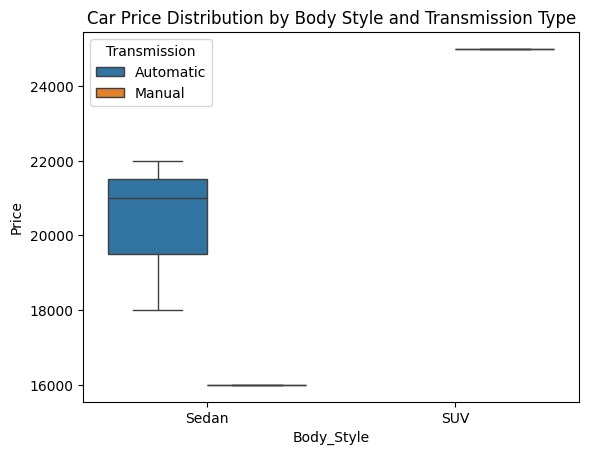

In [35]:
#13 How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(x='Body_Style', y='Price', hue='Transmission', data=df_car)
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.show()

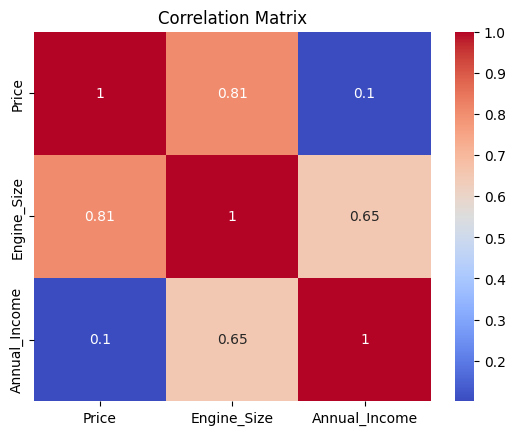

In [37]:
#14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
# Encode Engine as numeric for correlation
df_car['Engine_Size'] = df_car['Engine'].map({'I4': 4, 'V6': 6})
corr_matrix = df_car[['Price', 'Engine_Size', 'Annual_Income']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [38]:
#15  How does the average car price vary across different car models and engine types?
df_car.groupby(['Model', 'Engine'])['Price'].mean().sort_values(ascending=False)



,,Price
Model,Engine,
Escape,V6,25000.0
Civic,V6,22000.0
Camry,I4,21000.0
Corolla,I4,18000.0
Focus,I4,16000.0


In [39]:
# EDA 3
from google.colab import files
uploaded = files.upload()


Saving amazon.csv to amazon.csv


In [40]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('amazon.csv')

# Display basic info
df.info()

# Show the first few rows
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [41]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())


Missing values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

Duplicate rows: 0


In [42]:
# Drop rows with missing rating_count
df = df.dropna(subset=['rating_count'])


In [49]:
#1 What is the average rating for each product category?
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
print(df['rating'].isnull().sum())




1


In [50]:
df = df.dropna(subset=['rating'])


In [51]:
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print(avg_rating_by_category)


category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

In [58]:
#2 What are the top rating_count products by category?
df = df.copy()  # create a fresh copy to avoid chained assignment issues
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df = df.dropna(subset=['rating_count'])


top_rated_products = df.groupby('category').apply(
    lambda x: x.nlargest(3, 'rating_count')[['product_name', 'rating_count']]
).reset_index(drop=True)

print(top_rated_products)



                                          product_name  rating_count
0    Lapster USB 3.0 sata Cable for 2.5 inch SSD an...         817.0
1    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
2    Zoul USB Type C Fast Charging 3A Nylon Braided...         974.0
3    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...         974.0
4    Amazon Basics Magic Slate 8.5-inch LCD Writing...         401.0
..                                                 ...           ...
152         KENT POWP-Sediment Filter 10'' Thread WCAP         490.0
153  IONIX Tap filter Multilayer | Activated Carbon...         159.0
154  AVNISH Tap Water Purifier Filter Faucet 6 Laye...          37.0
155  BRUSTRO Copytinta Coloured Craft Paper A4 Size...         388.0
156  Classmate Pulse 1 Subject Notebook - 240mm x 1...         419.0

[157 rows x 2 columns]


<ipython-input-58-729061548fe1>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rated_products = df.groupby('category').apply(


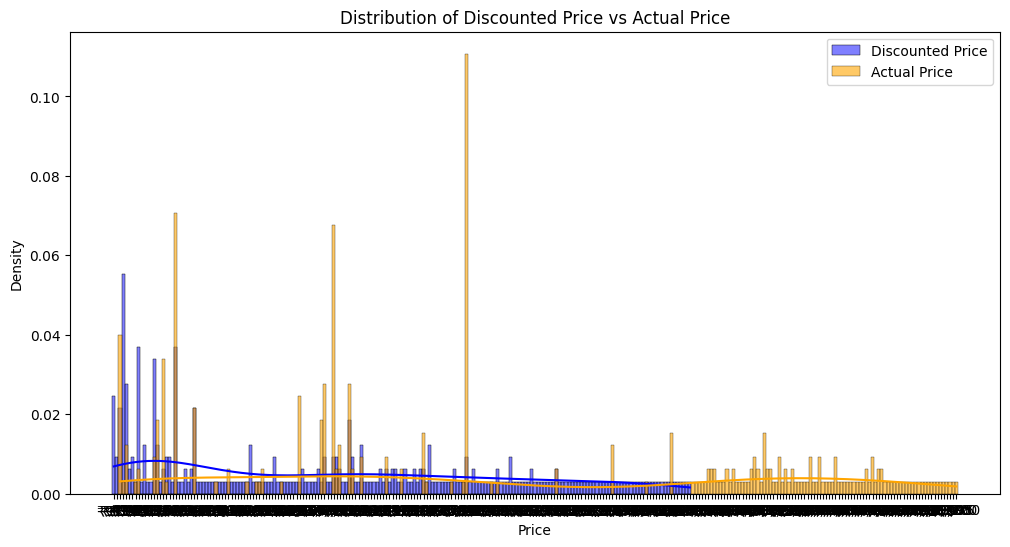

In [59]:
#3 What is the distribution of discounted prices vs. actual prices?
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.histplot(df['discounted_price'], color='blue', label='Discounted Price', kde=True, stat="density", bins=30)
sns.histplot(df['actual_price'], color='orange', label='Actual Price', kde=True, stat="density", bins=30, alpha=0.6)

plt.title('Distribution of Discounted Price vs Actual Price')
plt.xlabel('Price')
plt.legend()
plt.show()



In [60]:
#4  How does the average discount percentage vary across categories?

df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')
df = df.dropna(subset=['discount_percentage'])

avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print(avg_discount_by_category)

Series([], Name: discount_percentage, dtype: float64)


In [61]:
#5 What are the most popular product names?
popular_products = df['product_name'].value_counts().head(10)
print(popular_products)


Series([], Name: count, dtype: int64)


In [63]:
#6 What are the most popular product keywords?
from collections import Counter
import re

# Combine all product names into a single string
all_product_names = ' '.join(df['product_name'].astype(str))

# Convert to lowercase and split by non-alphabetic characters
words = re.findall(r'\b\w+\b', all_product_names.lower())

# Remove common stop words (optional)
stop_words = set(['the', 'and', 'for', 'with', 'from', 'this', 'that', 'you', 'your', 'are', 'was', 'has', 'have'])

filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

# Count frequency of each keyword
keyword_counts = Counter(filtered_words)

# Get top 20 most common keywords
top_keywords = keyword_counts.most_common(20)

print("Top 20 Product Keywords:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")



Top 20 Product Keywords:


In [66]:
#7 What are the most popular product reviews?
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have data in top_review_keywords
if top_review_keywords:
    keywords, counts = zip(*top_review_keywords)

    plt.figure(figsize=(12,6))
    sns.barplot(x=list(counts), y=list(keywords))
    plt.title('Top 20 Keywords in Review Titles')
    plt.xlabel('Frequency')
    plt.ylabel('Keyword')
    plt.show()
else:
    print("No data available to plot.")




No data available to plot.


In [67]:
#8  What is the correlation between discounted_price and rating?
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between discounted_price and rating: {correlation}")

Correlation between discounted_price and rating: nan


In [68]:
#9  What are the Top 5 categories based on the highest ratings?
top_rated_categories = df.groupby('category')['rating'].mean().nlargest(5)
print(top_rated_categories)

Series([], Name: rating, dtype: float64)


In [ ]:
#10 Identify any potential areas for improvement or optimization based on the data analysis?


# Areas for Improvement or Optimization (Based on EDA)

After analyzing the Amazon sales data, here are some key areas that could be improved or optimized:

1. **Fix Rating Count Issues**  
   - Some products have missing or incorrect values in the `rating_count` column.  
   - ✅ *Improvement:* Ensure data is properly cleaned and converted to the correct type before analysis.

2. **Better Use of Discounts**  
   - A high discount doesn’t always lead to higher ratings.  
   - ✅ *Improvement:* Focus on product quality and customer satisfaction instead of only offering heavy discounts.

3. **Encourage More Customer Reviews**  
   - Many products have few or no reviews, which limits user trust.  
   - ✅ *Improvement:* Encourage customers to leave feedback post-purchase, possibly through incentives.

4. **Improve Product Descriptions**  
   - User reviews often highlight important keywords like "quality," "price," or "delivery."  
   - ✅ *Improvement:* Include relevant keywords in the product description to improve searchability and clarity.

5. **Focus on High-Rating Categories**  
   - Certain categories consistently perform better in terms of ratings.  
   - ✅ *Improvement:* Study high-performing categories to identify best practices and promote them further.

6. **Handle Missing or Inconsistent Data**  
   - Ensure no missing values in essential fields like price, rating, and review content.  
   - ✅ *Improvement:* Use proper data validation during data entry and upload.

These improvements can help increase sales, enhance customer trust, and improve the accuracy of future data analyses.


In [69]:
# EDA 4
from google.colab import files
uploaded = files.upload()


Saving spotify.csv to spotify.csv


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('spotify.csv')
df.head()


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [75]:
#1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.
# Check null values
print("Missing values:\n", df.isnull().sum())

# Check duplicate rows
print("\nDuplicate rows:", df.duplicated().sum())


Missing values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate rows: 0


In [74]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with nulls (or fill them if necessary)
df.dropna(inplace=True)


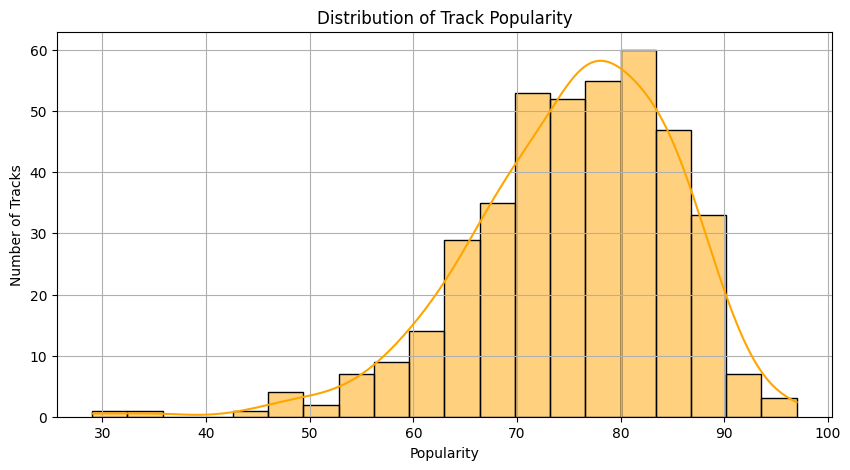

In [77]:
#2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?
plt.figure(figsize=(10, 5))
sns.histplot(df['Popularity'], bins=20, kde=True, color='orange')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()


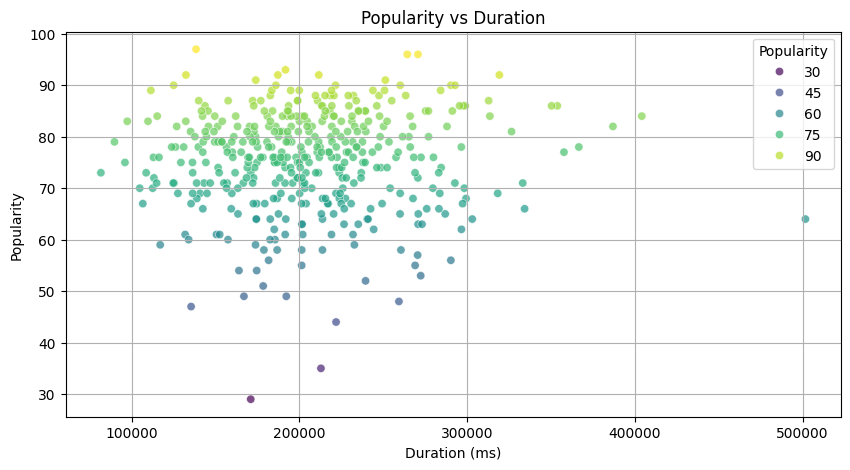

In [78]:
#3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', hue='Popularity', palette='viridis', alpha=0.7)
plt.title('Popularity vs Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()


<ipython-input-79-a99c8705faae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')


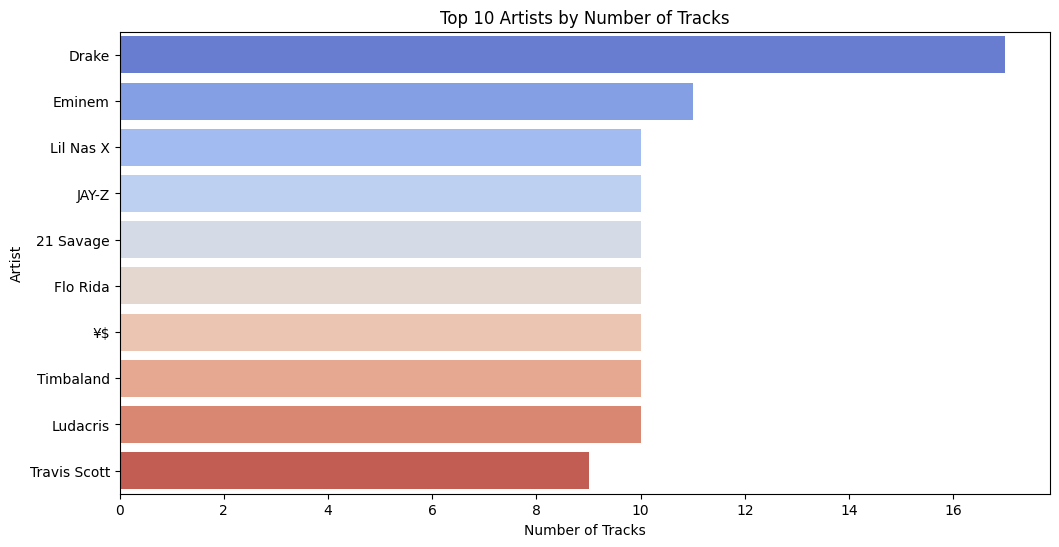

In [79]:
#4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?
plt.figure(figsize=(12, 6))
top_artists = df['Artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()


In [80]:
#5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?

least_popular = df.sort_values(by='Popularity', ascending=True).head(5)
least_popular[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [82]:
#6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
top_artists_avg_pop = df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(5)
top_artists_avg_pop


,Popularity
Artist,
cassö,92.000000
Trueno,89.000000
David Guetta,87.000000
Travis Scott,86.555556
¥$,85.100000


<ipython-input-86-9448983f7d03>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)', palette="Set2")


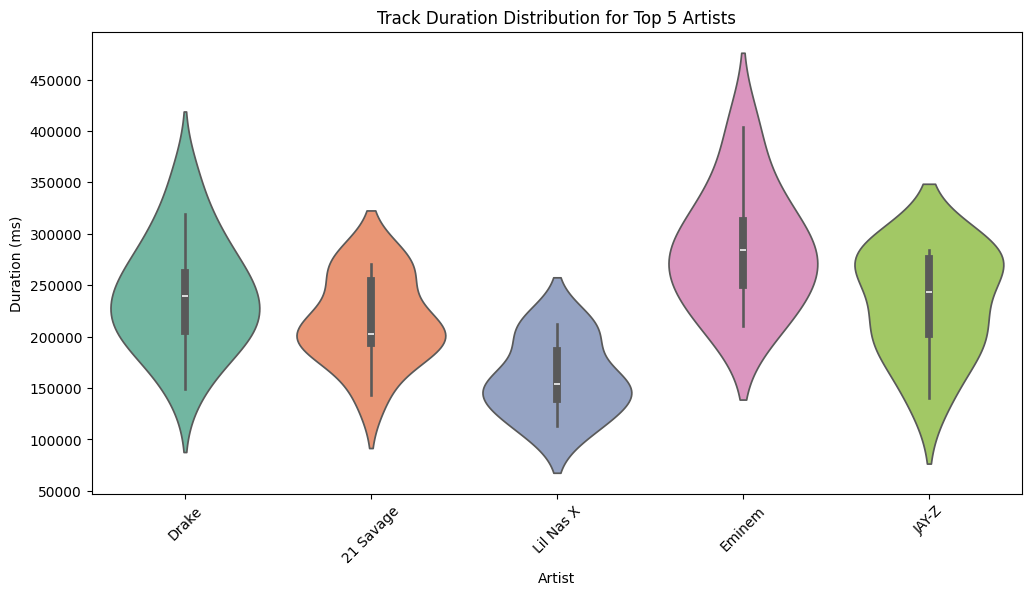

In [86]:
#7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
top_artists = df['Artist'].value_counts().head(5).index

plt.figure(figsize=(12, 6))
sns.violinplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)', palette="Set2")
plt.title('Track Duration Distribution for Top 5 Artists')
plt.xticks(rotation=45)
plt.show()


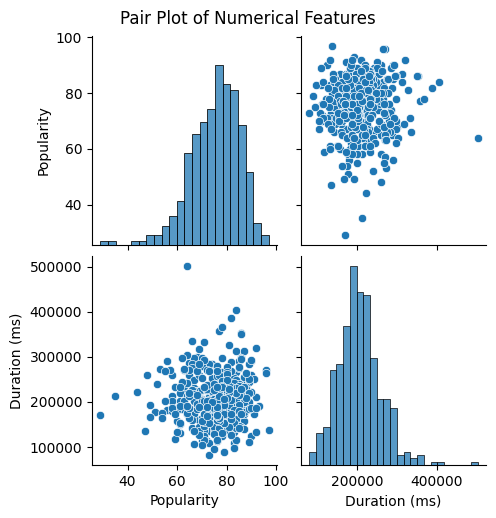

In [84]:
#8 Visualize relationships between multiple numerical variables simultaneously using a pair plot.
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns
numeric_cols = ['Popularity', 'Duration (ms)']

# Pair plot
sns.pairplot(df[numeric_cols])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


<ipython-input-87-64a884817d78>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Artist', y='Duration (ms)', palette="Set2")


<function matplotlib.pyplot.show(close=None, block=None)>

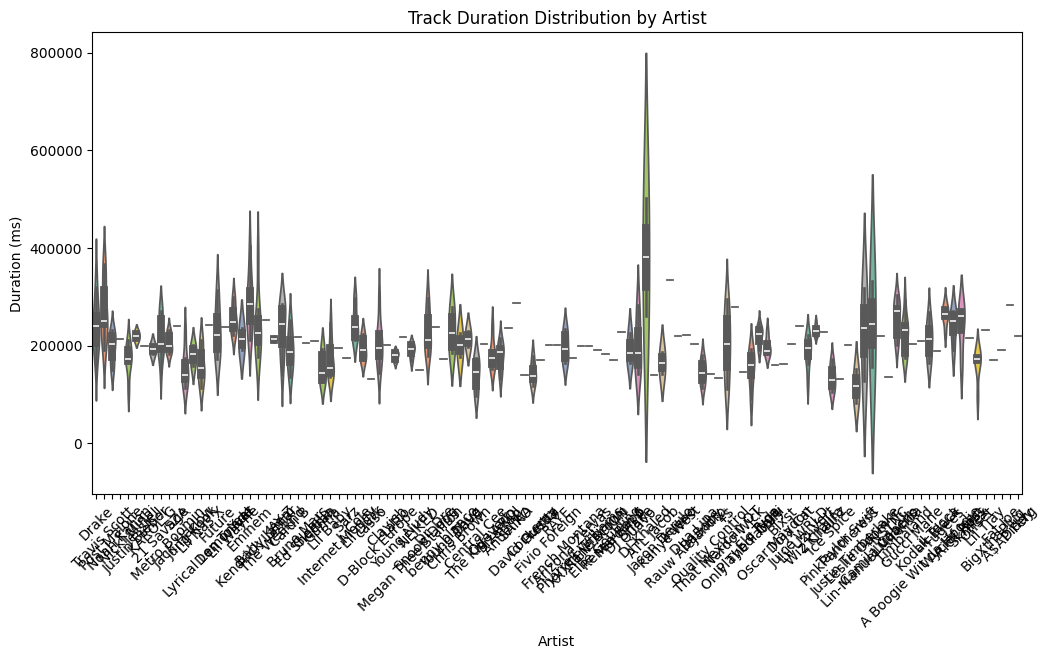

In [87]:
#9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Artist', y='Duration (ms)', palette="Set2")
plt.title('Track Duration Distribution by Artist')
plt.xticks(rotation=45)
plt.show


<ipython-input-89-2f42b2547a7c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Popularity', palette="coolwarm", size=4)


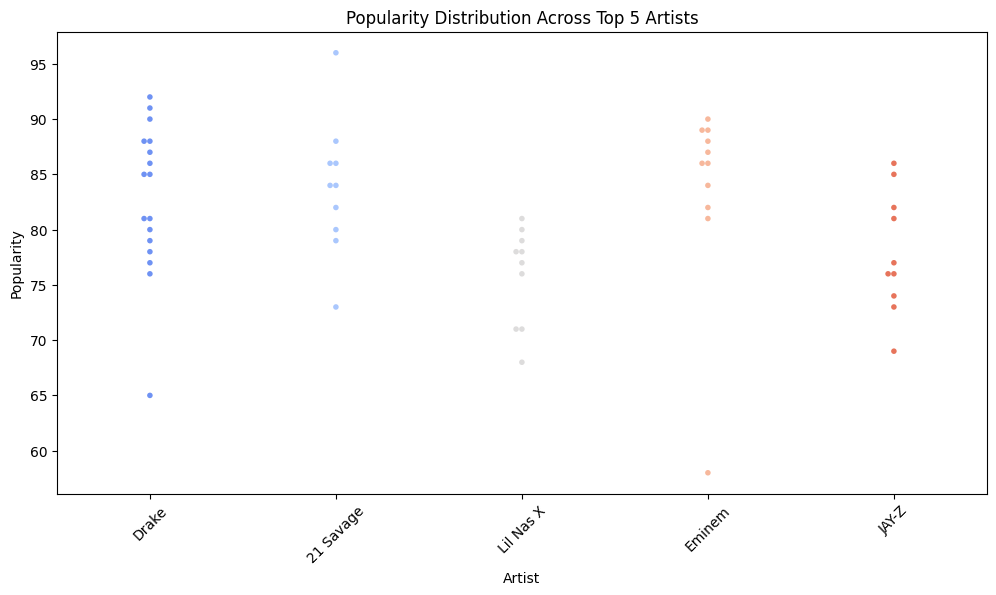

In [89]:
#10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

plt.figure(figsize=(12, 6))
sns.swarmplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Popularity', palette="coolwarm", size=4)
plt.title('Popularity Distribution Across Top 5 Artists')
plt.xticks(rotation=45)
plt.show()
